In [12]:
import numpy as np
mu, sigma = 0, 0.1
list10 = np.random.normal(mu,sigma,10)
list100 = np.random.normal(mu,sigma,100)
list1000 = np.random.normal(mu,sigma,1000)

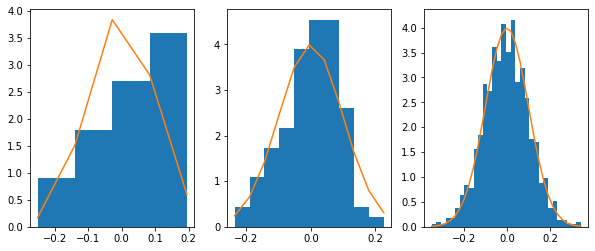

In [13]:
import math
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))

count, bins, ignored = ax1.hist(list10, math.ceil(math.sqrt(10)), density=True)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))

count, bins, ignored = ax2.hist(list100, math.ceil(math.sqrt(100)), density=True)
ax2.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))

count, bins, ignored = ax3.hist(list1000, math.ceil(math.sqrt(1000)), density=True)
ax3.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))

plt.show()

In [15]:
counters = np.empty(100)
for iter in range(100):
    randList5 = list(np.random.randint(0,2,5))
    counter = 0
    while 0 in randList5:
        for i in range(len(randList5)):
            if np.random.uniform(0,1) <= 0.1:
                randList5[i] ^= 1
                counter += 1
    randList5
    counters[iter] = counter
print(counters)


[ 57. 108. 113. 135.  17.   1. 360.   2.   3.  23.  39.  37.  44.  39.
  50.  29.  28.   8.   8.   0.  20.  18.   0.  26.  83.  19.   0.  20.
  31.  13.  54.  81.  36.  26.  10.  45.   0.  23.  19.  61.  16.  25.
  12.  10.   5.   0.   0.  28.   0.  38.  55.  40.  87.  29.   5.   6.
  19. 202.  30. 122.  55.  18.  89.  17.  23.  14. 143.   9.  43.  28.
  17.  28. 166.  75.  91.  29.   0. 135.  18.  37.  12.   3.  80.  15.
  41.   3.  12.  37.  74.  17.  51. 216.   7.   3.  20.   5.  48.   0.
   7.  23.]


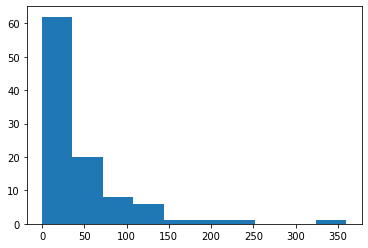

In [16]:
plt.hist(counters, math.ceil(math.sqrt(100)))
plt.show()


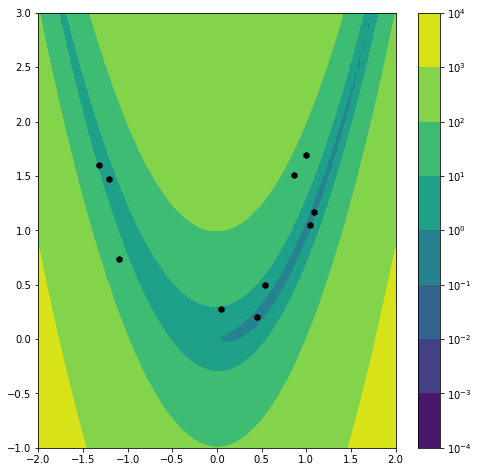

In [5]:
from pylab import meshgrid
from matplotlib import colors
import time
from IPython.display import clear_output
np.random.seed(10)

a, b = 1, 100
def func(x,y):
 return (a-x)**2+b*(y-x**2)**2

fig,ax = plt.subplots(1,1,figsize=(8,8))
x = np.linspace(-2.0,2.0,80)
y = np.linspace(-1.0,3.0,80)
X,Y = meshgrid(x, y)
Z = func(X, Y) 

cset = ax.contourf(X, Y, Z, norm=colors.LogNorm())
plt.colorbar(cset)

# Init. population w/ 20 rnd. individuals
popX = np.random.uniform(low=-2.0, high=2.0, size=20)
popY = np.random.uniform(low=-1.0, high=3.0, size=20)
funcVals = np.array(func(popX, popY))

v = 10 # Number of visualized individuals
idx = np.argpartition(funcVals, v)
filter_indices = idx[:v]
bestPopX = popX[filter_indices] 
bestPopY = popY[filter_indices]
#ax.scatter(popX,popY,marker='*', color='black')
ax.scatter(bestPopX, bestPopY, marker='h', color='black')

#time.sleep(2)
clear_output()